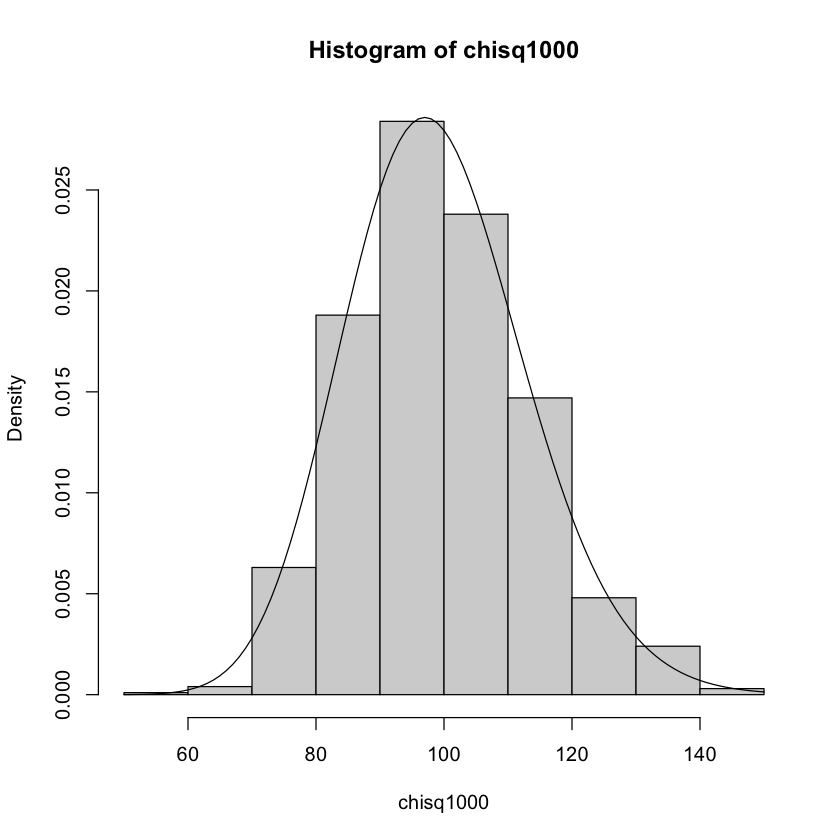

In [1]:
#1
# random = function(n) {
#     x = rnorm(n,5,2)
# }
# x2 = function(x) {
#     x = pchisq(x,99)
# }
# random.100 = replicate(1000,(100-1)*var(random(100))/4)
# plot(ecdf(random.100))
# curve(x2,add = TRUE)

n <- 100
mu <- 3
sigma <- 2
chisq1 <- function() {
x <- rnorm(n, mean = mu, sd = sigma)
(n - 1) * sd(x)^2/(sigma^2) }
chisq1000 <- replicate(1000, chisq1())
hist(chisq1000, freq = FALSE)
curve(dchisq(x, df = n - 1), add = TRUE)

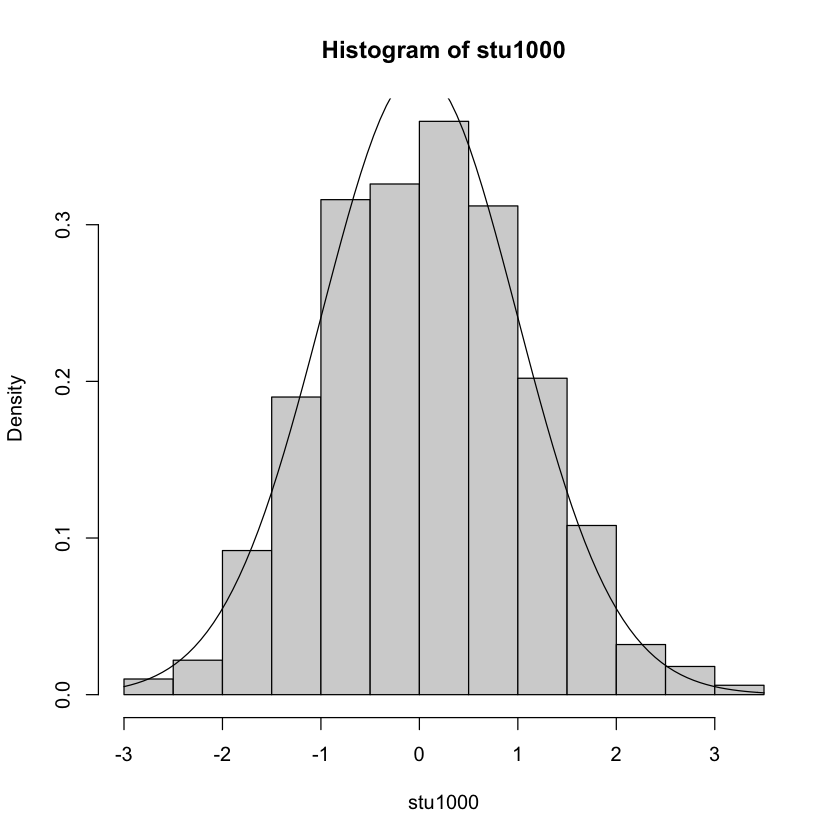

In [2]:
#2
# random = function(n) {
#     x = rnorm(n,5,2)
# }

# f = function(x){
#     (mean(x)-5)/(sd(x)/10)
# }

# t99 = function(x) {
#     x = pt(x,99)
# }

# random.1000 = replicate(1000,f(random(100)))
# plot(ecdf(random.1000))
# curve(t99,add=TRUE)

n <- 100
mu <- 3
sigma <- 2
stu1 <- function() {
x <- rnorm(n, mean = mu, sd = sigma)
(mean(x) - mu)/(sd(x)/sqrt(n))
}
stu1000 <- replicate(1000, stu1())
hist(stu1000, freq = FALSE)
curve(dt(x, df = n - 1), add = TRUE)

In [3]:
#3
# x = rnorm(100,5,2)
# c2 = mean(x)+qnorm(0.975,5,2)*2/10
# c1 = mean(x)-qnorm(0.975,5,2)*2/10
# c1
# c2

n <- 100
x <- rnorm(n, mean = 42, sd = pi)
alpha <- 0.05
mean(x) + c(-1, 1) * qnorm(1 - alpha/2) * pi/sqrt(n)

[1] 41.25544 42.48692

In [8]:
#4
# x = rnorm(100,5,2)
# alpha = 0.05
# a = t.test(x,conf.level = 1 - alpha)
# a$conf.int

n <- 100
alpha <- 0.05
x <- rnorm(n)
mean(x) + c(-1, 1) * qt(1 - alpha/2, df = n - 1) * sd(x)/sqrt(n)
a = t.test(x, conf.level = 1 - alpha)
a$conf.int
attr(a,"conf.level")

[1] -0.1917232  0.1953098

[1] -0.1917232  0.1953098
attr(,"conf.level")
[1] 0.95

NULL

In [5]:
#5/6
# gen_IC = function(x,alpha){
#     t.test(x,conf.level = 1 - alpha)$conf.int
# }
gen_IC <- function(x, alpha) {
n <- length(x)
mean(x) + c(-1, 1) * qt(1 - alpha/2, df = n - 1) * sd(x)/sqrt(n)
}

param <- 3
alpha <- 0.05
ICs <- replicate(100, gen_IC(rnorm(100, mean = param), alpha))
ICs

3.068504,2.788780,2.777119,2.773195,2.850420,2.871250,2.653279,2.846180,2.714969,2.849729,⋯,2.778338,2.822884,2.678598,2.713067,2.891370,2.924614,2.841778,2.724759,2.677882,2.760874
3.477262,3.178125,3.147945,3.154566,3.236082,3.261382,3.038691,3.216516,3.162616,3.237001,⋯,3.161681,3.185825,3.085868,3.117679,3.289335,3.294793,3.267273,3.074840,3.072866,3.154493


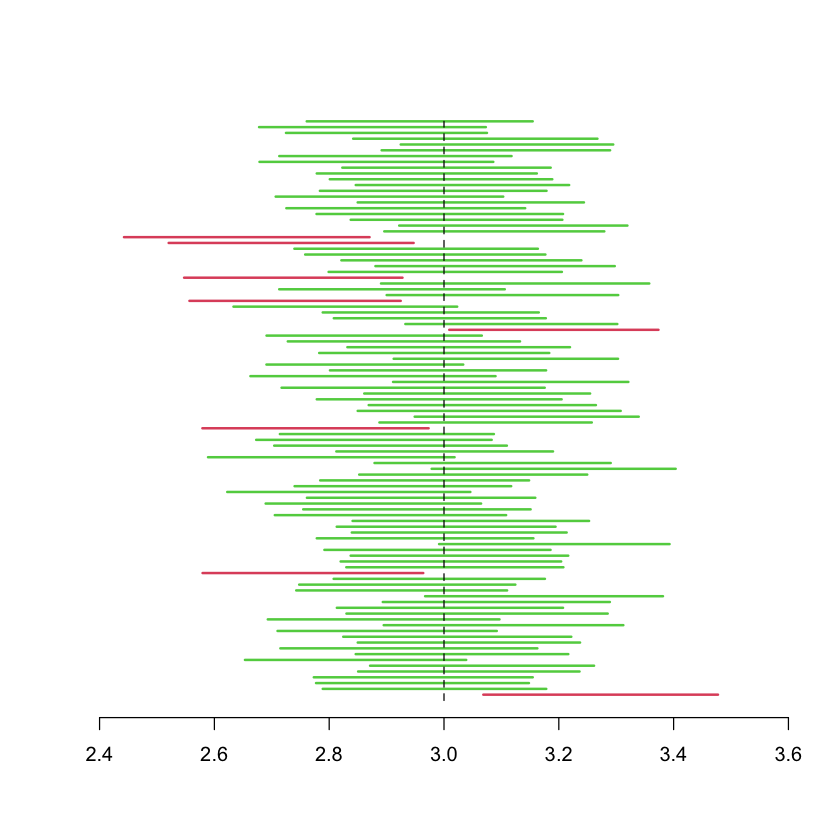

In [9]:
source("/Users/whz/utc/2021.automne/SY02/utils (1).R")
plot_ICs(ICs,param)

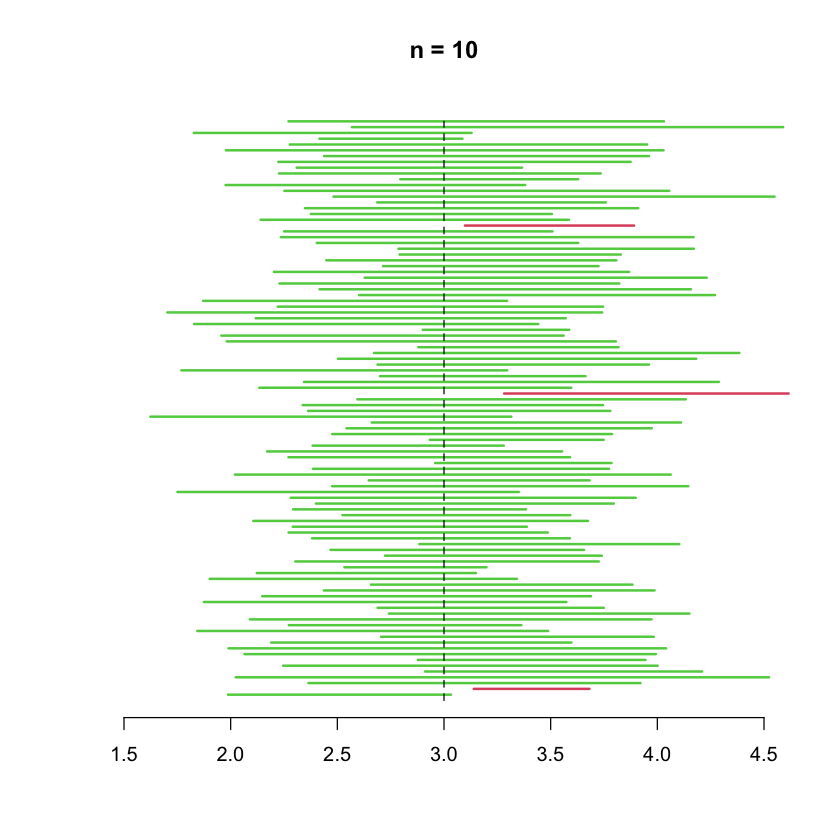

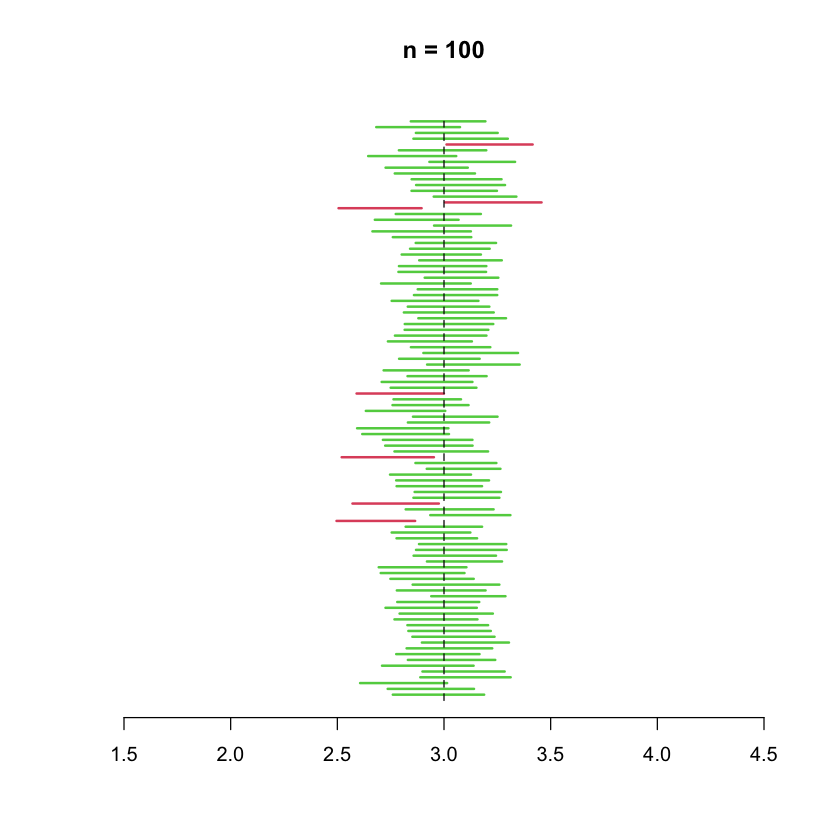

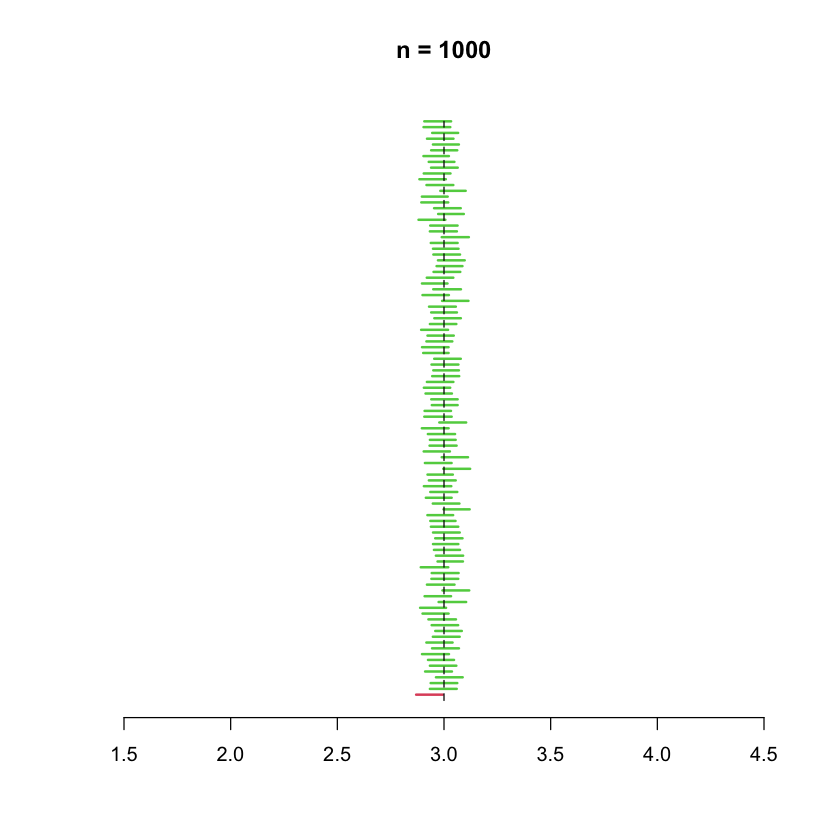

In [10]:
alpha <- 0.05
ICs10 <- replicate(100, gen_IC(rnorm(10, mean = param), alpha))
ICs100 <- replicate(100, gen_IC(rnorm(100, mean = param), alpha))
ICs1000 <- replicate(100, gen_IC(rnorm(1000, mean = param), alpha))
plot_ICs(ICs10, param, xlim = c(1.5, 4.5), main = "n = 10")
plot_ICs(ICs100, param, xlim = c(1.5, 4.5), main = "n = 100")
plot_ICs(ICs1000, param, xlim = c(1.5, 4.5), main = "n = 1000")

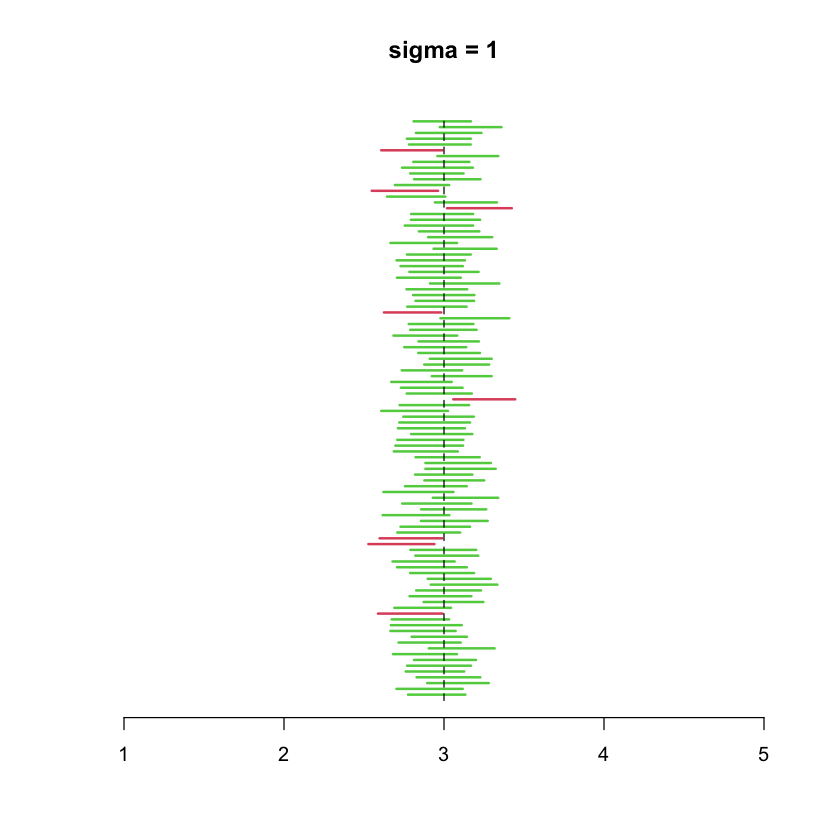

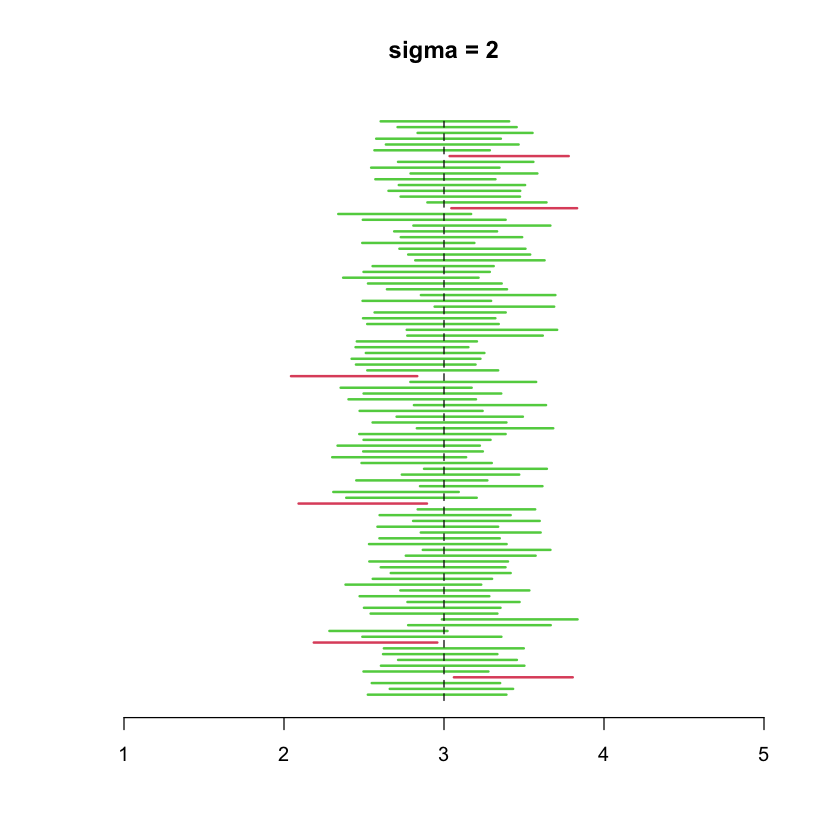

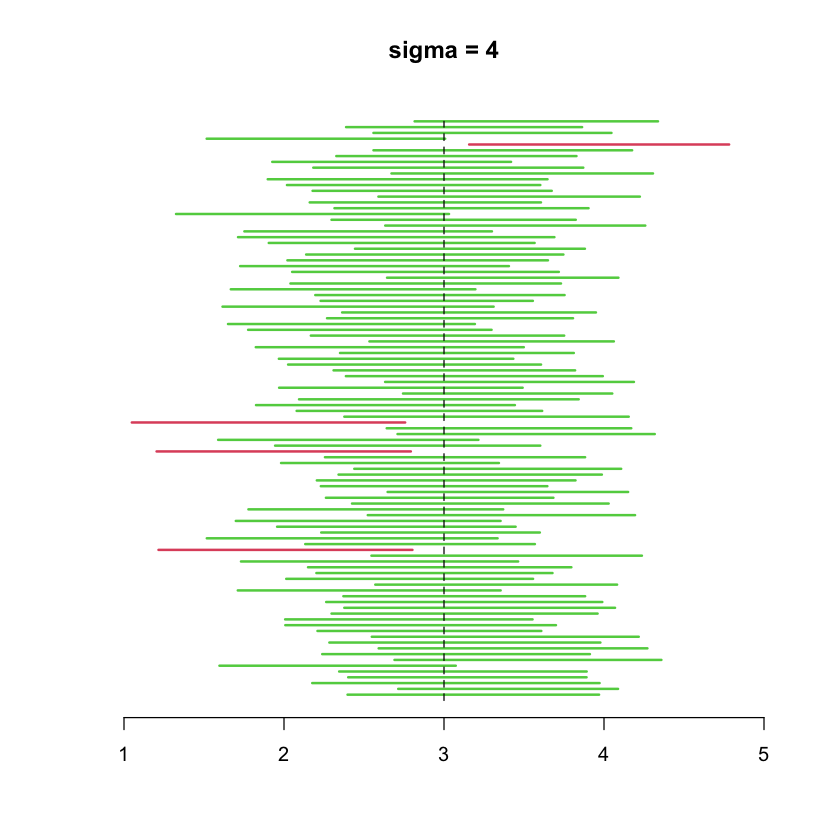

In [11]:
alpha <- 0.05
ICs10 <- replicate(100, gen_IC(rnorm(100, mean = param, sd = 1), alpha))
ICs100 <- replicate(100, gen_IC(rnorm(100, mean = param, sd = 2), alpha))
ICs1000 <- replicate(100, gen_IC(rnorm(100, mean = param, sd = 4), alpha))
plot_ICs(ICs10, param, xlim = c(1, 5), main = "sigma = 1")
plot_ICs(ICs100, param, xlim = c(1, 5), main = "sigma = 2")
plot_ICs(ICs1000, param, xlim = c(1, 5), main = "sigma = 4")

In [13]:
hit <- function(n, param, alpha) {
x <- rnorm(n, mean = param)
IC <- gen_IC(x, alpha)
param >= IC[1] & param <= IC[2]
}
n <- 100
alpha <- 0.05
hm <- replicate(10000, hit(n, 3, alpha))
mean(hm)

[1] 0.9496

In [14]:
slutsky <- function(p, n, k, alpha) {
sim <- function() {
x <- rbinom(n, 1, p)
phat <- mean(x)
IC <- phat + c(-1, 1) * qnorm(1 - alpha/2) * sqrt(phat * (1 - phat)/n)
p >= IC[1] & p <= IC[2] }
mean(replicate(k, sim()))
}

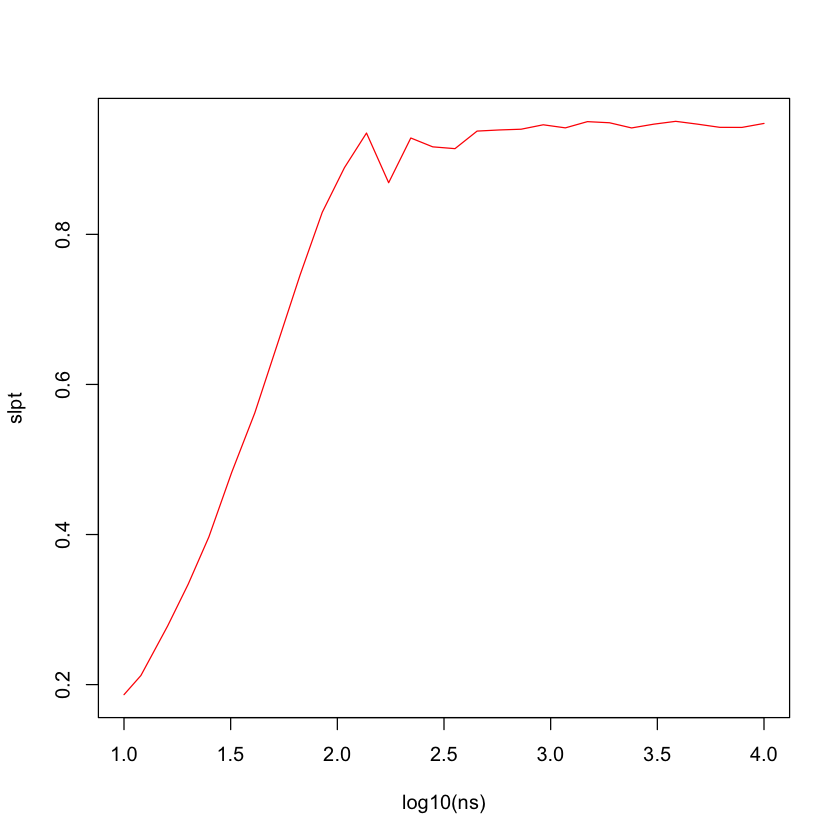

In [15]:
p <- 0.02
k <- 10000
alpha <- 0.05
ns <- floor(10^seq(1, 4, length.out = 30)) # 30 points en échelle logarithmique
slpt <- sapply(ns, function(n) slutsky(p, n, k, alpha))
plot(log10(ns), slpt, type = "l", col = "red")

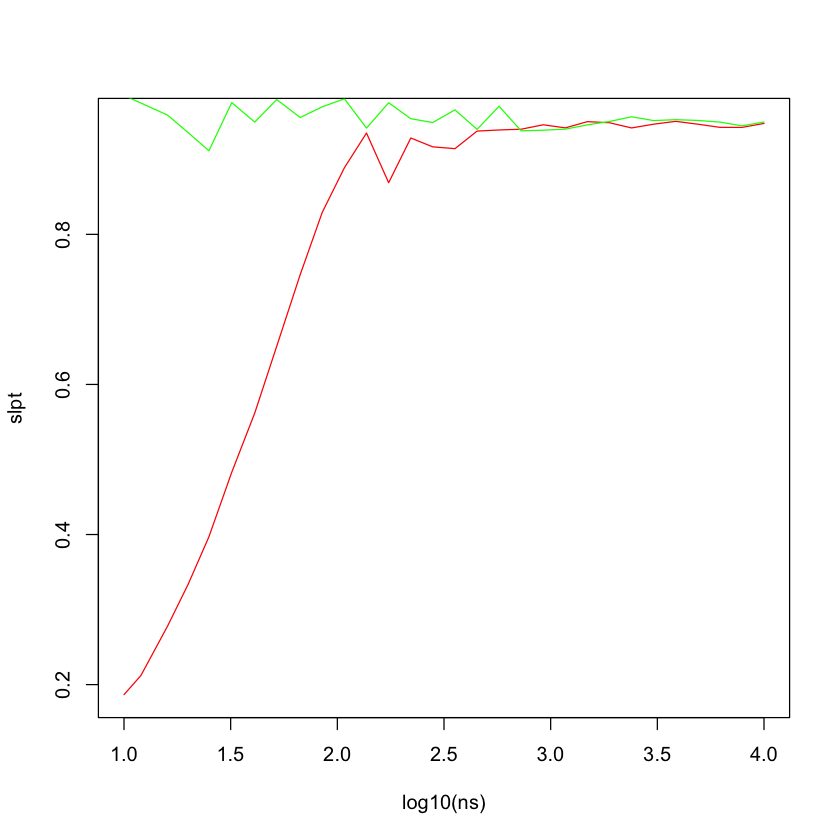

In [18]:
noslutsky <- function(p, n, k, alpha) {
sim <- function() {
x <- rbinom(n, 1, p)
phat <- mean(x)
u <- qnorm(1 - alpha/2)
IC <- (2 * n * phat + u^2 + c(-1, 1) * u * sqrt(u^2 + 4 * n * phat * (1 - phat)))/(2 * n + 2 * u^2) 
p >= IC[1] & p <= IC[2] }
mean(replicate(k, sim()))
}
nslpt <- sapply(ns, function(n) noslutsky(p, n, k, alpha))
plot(log10(ns), slpt, type = "l", col = "red")
lines(log10(ns), nslpt, col = "green")